In [433]:
## Importing all necessary libraries and modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels
import datetime
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [434]:
# Reading the dataset
df=pd.read_csv("Bike_day.csv")

In [435]:
# Let's take a look at the first few rows
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [436]:
# Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [437]:
# Let's look at the number of rows and columns in the dataset
df.shape

(730, 16)

In [438]:
# Getting insights of the features
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [439]:
# Assigning string values to different seasons instead of numeric values. These numeric values may misindicate some order to it.

# 1=spring
df.loc[(df['season'] == 1) , 'season'] = 'spring'

# 2=summer
df.loc[(df['season'] == 2) , 'season'] = 'summer'

# 3=fall
df.loc[(df['season'] == 3) , 'season'] = 'fall'

# 4=winter
df.loc[(df['season'] == 4) , 'season'] = 'winter'
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [440]:
# Checking whether the conversion is done properly or not and getting data count on the basis of season
df['season'].astype('category').value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [441]:
# year (0: 2018, 1:2019)
df['yr'].astype('category').value_counts()

0    365
1    365
Name: yr, dtype: int64

In [442]:
# Assigning string values to different months instead of numeric values which may misindicate some order to it.
# A function has been created to map the actual numbers to categorical levels.
import calendar
df['mnth'] = df['mnth'].apply(lambda x: calendar.month_abbr[x])
df['mnth'].unique()
df['mnth'].astype('category').value_counts()

Aug    62
Dec    62
Jan    62
Jul    62
Mar    62
May    62
Oct    62
Apr    60
Jun    60
Nov    60
Sep    60
Feb    56
Name: mnth, dtype: int64

In [443]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [444]:
# whether day is a holiday or not (0: No, 1: Yes)
df['holiday'].astype('category').value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [445]:
def str_map(x):
    return x.map({1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat', 0: 'Sun'})

# Applying the function to the columns
df[['weekday']] = df[['weekday']].apply(str_map)

In [446]:
# Checking whether the conversion is done properly or not and getting data count on the basis of weekdays
df['weekday'].astype('category').value_counts()

Mon    105
Sat    105
Sun    105
Fri    104
Thu    104
Tue    104
Wed    103
Name: weekday, dtype: int64

In [447]:
# if a day is neither weekend nor a holiday it takes the value 1, otherwise 0
df['workingday'].astype('category').value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [448]:
def weather_map(x):
    return x.map({1: 'Good', 2: 'Average', 3: 'Bad', 4: 'Very Bad'})

# Applying the function to the two columns
df[['weathersit']] = df[['weathersit']].apply(weather_map)
df['weathersit'].astype('category').value_counts()

Good       463
Average    246
Bad         21
Name: weathersit, dtype: int64

In [449]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Average,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Average,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Good,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Good,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Good,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### 2. Data Visualisation
Let's now spend some time doing what is arguably the most important step - understanding the data.

Understanding the distribution of various numeric variables
If there is some obvious multicollinearity going on, this is the first place to catch it
Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using matplotlib and seaborn.

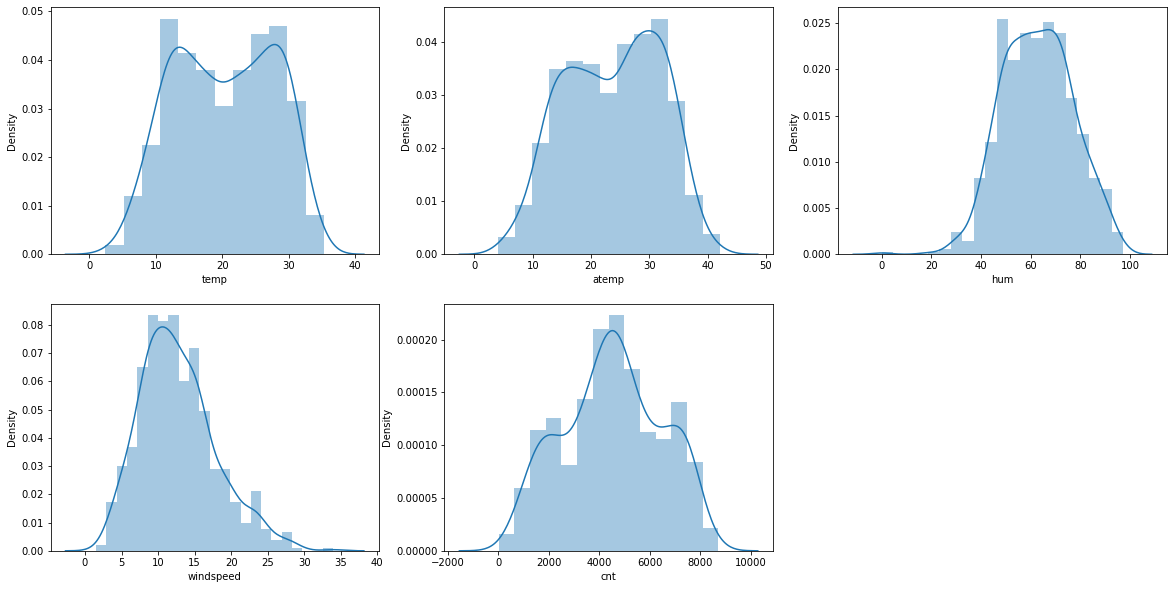

In [450]:
plt.figure(figsize = (20,10))
plt.subplot(2,3,1)
sns.distplot(df['temp'])
plt.subplot(2,3,2)
sns.distplot(df['atemp'])
plt.subplot(2,3,3)
sns.distplot(df['hum'])
plt.subplot(2,3,4)
sns.distplot(df['windspeed'])
plt.subplot(2,3,5)
sns.distplot(df['cnt'])

plt.show()

In [451]:
# Converting date to datetime format
df['dteday']=df['dteday'].astype('datetime64')

In [452]:
# All categorical variables in the dataset
categorical_df=df.select_dtypes(exclude=['float64','datetime64','int64'])
print(categorical_df.columns)

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')


In [453]:
categorical_df

,season,mnth,weekday,weathersit
0,spring,Jan,Sat,Average
1,spring,Jan,Sun,Average
2,spring,Jan,Mon,Good
3,spring,Jan,Tue,Good
4,spring,Jan,Wed,Good
...,...,...,...,...
725,spring,Dec,Thu,Average
726,spring,Dec,Fri,Average
727,spring,Dec,Sat,Average
728,spring,Dec,Sun,Good


### Visualising Categorical Variables
As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

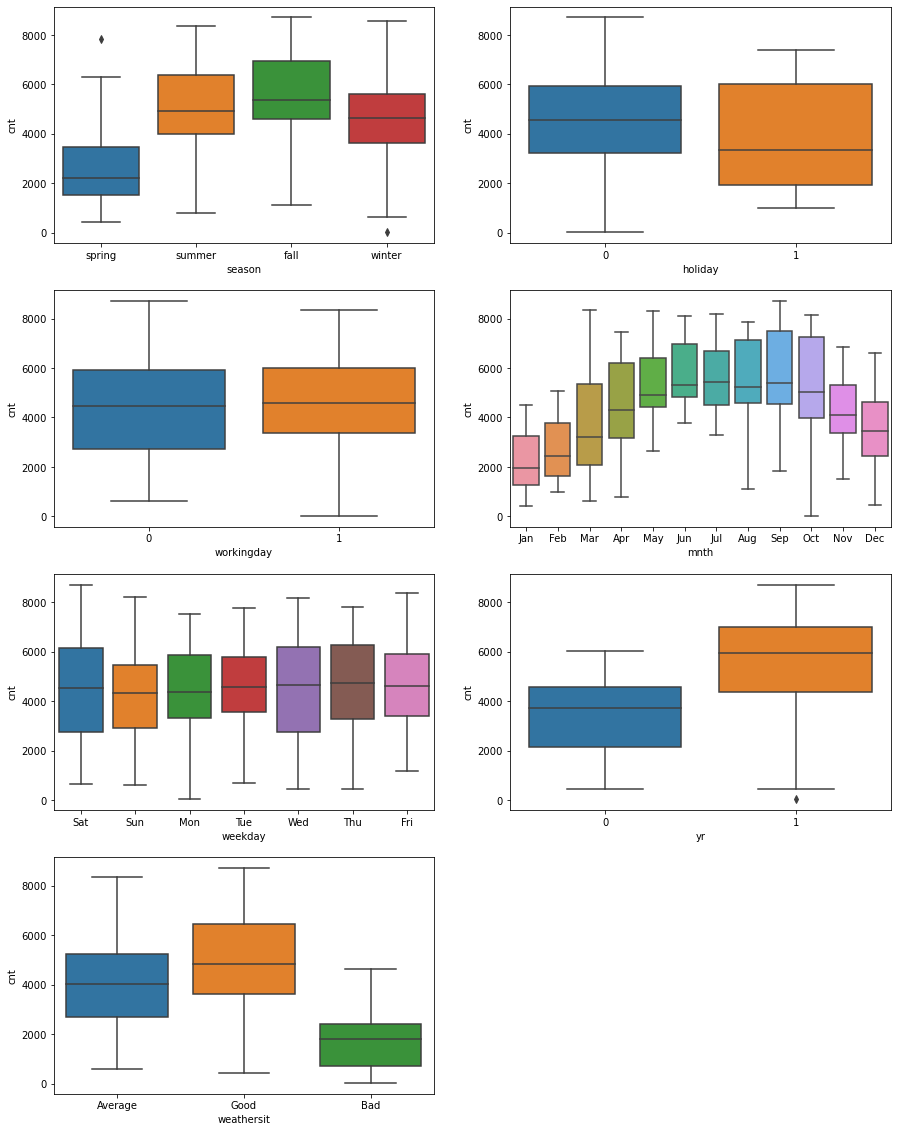

In [454]:
plt.figure(figsize=(15, 20))  
plt.subplot(4,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(4,2,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(4,2,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(4,2,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(4,2,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(4,2,6)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(4,2,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.show()

### Visualising Numeric Variables
Let's make a pairplot of all the numeric variables

In [455]:
# Converting "casual","registered" and "cnt" numeric variables to float. 
# This step is performed to seperate out categorical variables like 'yr','holiday','workingday' which have binary values in them
IntVariableList = ["casual","registered","cnt"]

for var in IntVariableList:
    df[var] = df[var].astype("float")

In [456]:
# All numeric variables in the dataset
numeric_df = df.select_dtypes(include=['float64'])
numeric_df.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


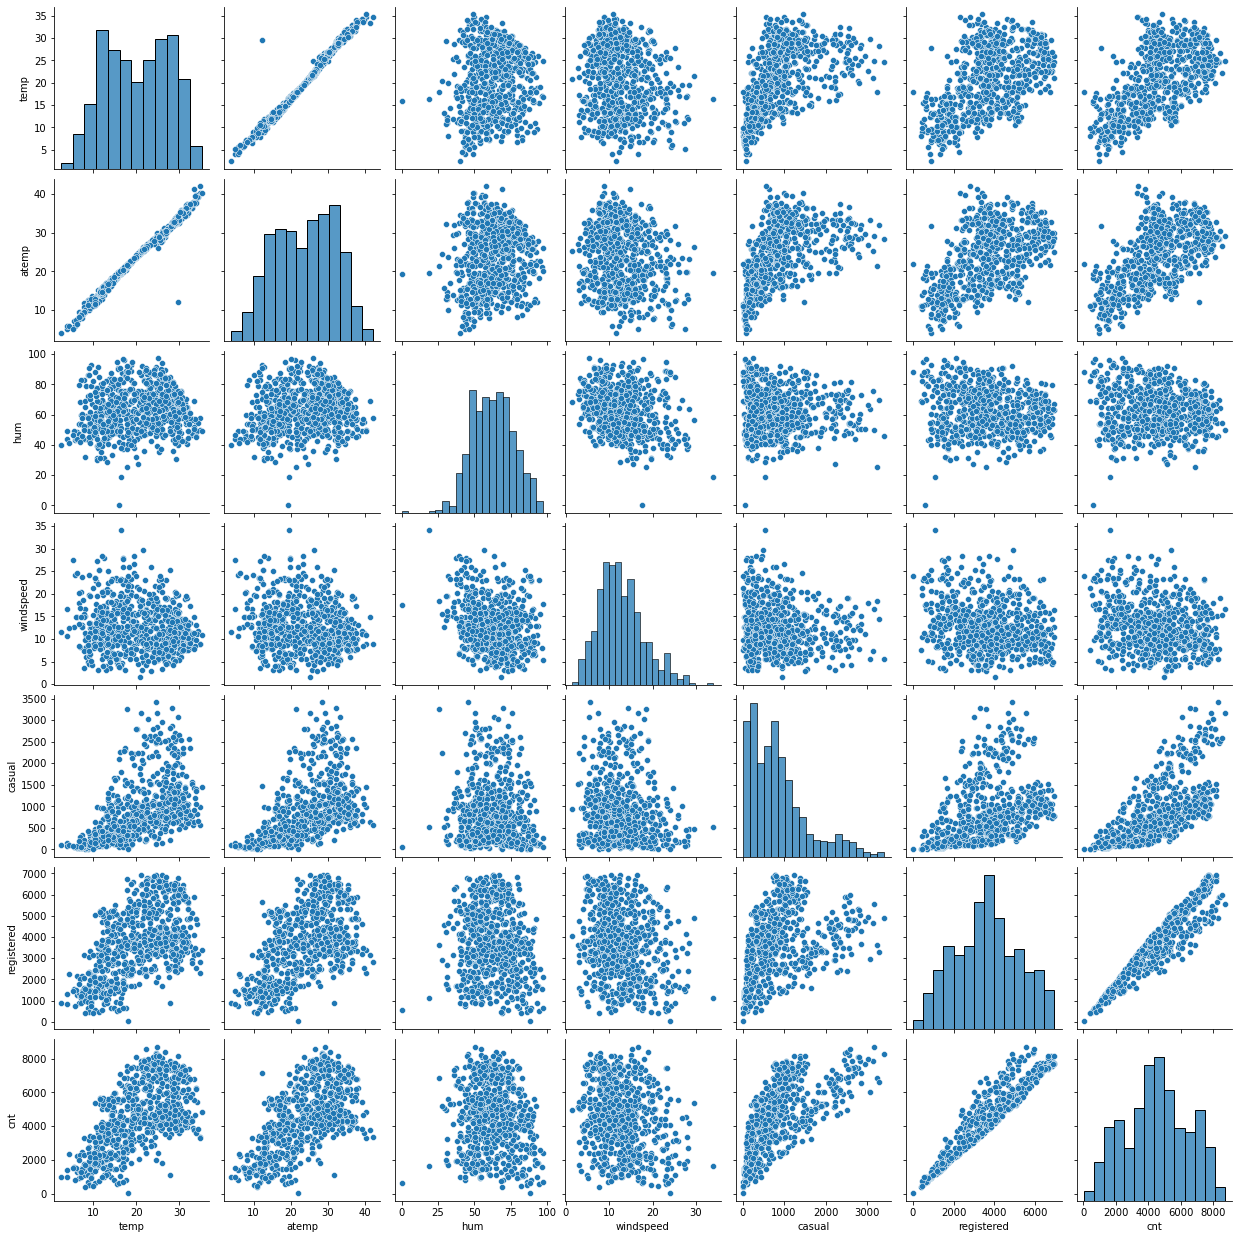

In [457]:
# Pairwise scatter plot
sns.pairplot(numeric_df)
plt.show()

### We can better plot correlation matrix between variables to know the exact values of correlation between them

In [458]:
# Correlation matrix
cor = numeric_df.corr()
cor

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


### Correlations on a heatmap for better visualisation

<AxesSubplot:>

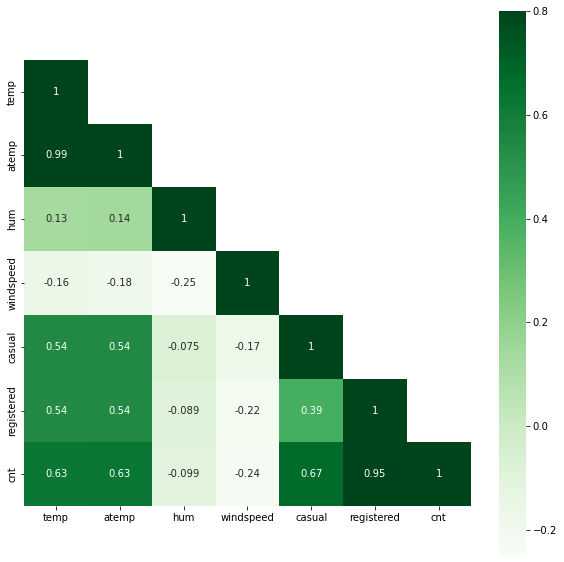

In [459]:
# heatmap
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(cor, mask=mask,vmax=.8, square=True,annot=True, cmap='Greens')

In [460]:
#removing atemp as it is highly correlated with temp
df.drop('atemp',axis=1,inplace=True)

### 3. Data Preparation
Data Preparation
Let's now prepare the data and build the model. Note that we had not included 'yr', 'mnth', 'holiday', 'weekday' and 'workingday' as object variables in the initial data exploration steps so as to avoid too many dummy variables creation. They have binary values: 0s and 1s in them which have specific meanings associated with them.

In [461]:
# Subset all categorical variables
categorical_df=df.select_dtypes(include=['object'])

### Dummy Variables¶
The variable season,mnth,weekday and weathersit have different levels. We need to convert these levels into integers.

For this, we will use something called dummy variables.

In [462]:
# Convert into dummies
df_dummies = pd.get_dummies(categorical_df, drop_first=True)
df_dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Bad,weathersit_Good
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [463]:
# Drop categorical variable columns
df = df.drop(list(categorical_df.columns), axis=1)

In [464]:
# Concatenate dummy variables with the original dataframe
df = pd.concat([df, df_dummies], axis=1)

In [465]:
# Let's check the first few rows
df.head()

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Bad,weathersit_Good
0,1,2018-01-01,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,...,0,0,0,1,0,0,0,0,0,0
1,2,2018-02-01,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,...,0,0,0,0,1,0,0,0,0,0
2,3,2018-03-01,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,...,0,0,1,0,0,0,0,0,0,1
3,4,2018-04-01,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,...,0,0,0,0,0,0,1,0,0,1
4,5,2018-05-01,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,...,0,0,0,0,0,0,0,1,0,1


In [466]:
# Drop the 'index' and 'dteday' column as they of not any use to us for the analysis
df =df.drop(['instant','dteday'], axis = 1, inplace = False)
df.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Bad,weathersit_Good
0,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,985.0,1,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,801.0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,1,...,0,0,1,0,0,0,0,0,0,1
3,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0,1,...,0,0,0,0,0,0,1,0,0,1
4,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0,1,...,0,0,0,0,0,0,0,1,0,1


### 4. Model Building and Evaluation
The first step to model building is the usual test-train split

In [467]:
# Split the dataframe into train and test sets
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=100)

In [468]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Bad,weathersit_Good
653,1,0,1,19.201653,55.8333,12.208807,922.0,6612.0,7534.0,0,...,1,0,0,0,0,0,1,0,0,1
576,1,0,1,29.246653,70.4167,11.083475,968.0,6248.0,7216.0,0,...,0,0,0,0,0,0,1,0,0,1
426,1,0,0,16.980847,62.1250,10.792293,956.0,3110.0,4066.0,1,...,0,0,0,1,0,0,0,0,0,0
728,1,0,0,10.489153,48.3333,23.500518,364.0,1432.0,1796.0,1,...,0,0,0,0,1,0,0,0,0,1
482,1,0,0,15.443347,48.9583,8.708325,1120.0,3100.0,4220.0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,29.554153,58.7917,13.916771,1017.0,5647.0,6664.0,0,...,0,0,1,0,0,0,0,0,0,0
578,1,0,1,30.852500,65.9583,8.666718,983.0,6278.0,7261.0,0,...,0,0,0,0,0,1,0,0,0,1
53,0,0,1,9.091299,42.3043,6.305571,139.0,1778.0,1917.0,1,...,0,0,0,0,0,0,0,1,0,1
350,0,0,0,10.591653,56.0833,16.292189,275.0,2464.0,2739.0,0,...,0,0,0,1,0,0,0,0,0,0


### Scaling
Now that we have done the test-train split, we need to scale the variables for better interpretability. But we only need the scale the numeric columns and not the dummy variables.

Let's scale all these columns using MinMaxScaler. 

In [469]:
scaler = MinMaxScaler()

In [470]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
var = ['temp', 'hum', 'windspeed','casual','registered','cnt']

df_train[var] = scaler.fit_transform(df_train[var])

In [471]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Bad,weathersit_Good
653,1,0,1,0.509887,0.575354,0.300794,0.280402,0.951776,0.864243,0,...,1,0,0,0,0,0,1,0,0,1
576,1,0,1,0.815169,0.725633,0.264686,0.294422,0.899220,0.827658,0,...,0,0,0,0,0,0,1,0,0,1
426,1,0,0,0.442393,0.640189,0.255342,0.290765,0.446145,0.465255,1,...,0,0,0,1,0,0,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.110332,0.203869,0.204096,1,...,0,0,0,0,1,0,0,0,0,1
482,1,0,0,0.395666,0.504508,0.188475,0.340750,0.444701,0.482973,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.824514,0.605840,0.355596,0.309357,0.812446,0.764151,0,...,0,0,1,0,0,0,0,0,0,0
578,1,0,1,0.863973,0.679690,0.187140,0.298994,0.903552,0.832835,0,...,0,0,0,0,0,1,0,0,0,1
53,0,0,1,0.202618,0.435939,0.111379,0.041756,0.253826,0.218017,1,...,0,0,0,0,0,0,0,1,0,1
350,0,0,0,0.248216,0.577930,0.431816,0.083206,0.352873,0.312586,0,...,0,0,0,1,0,0,0,0,0,0


In [472]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Bad,weathersit_Good
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.254661,0.523944,0.513620,0.243137,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.627451
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.206011,0.228175,0.224593,0.429398,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.483958
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.094179,0.353487,0.356420,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.212740,0.525123,0.518638,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.327415,0.696073,0.684710,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


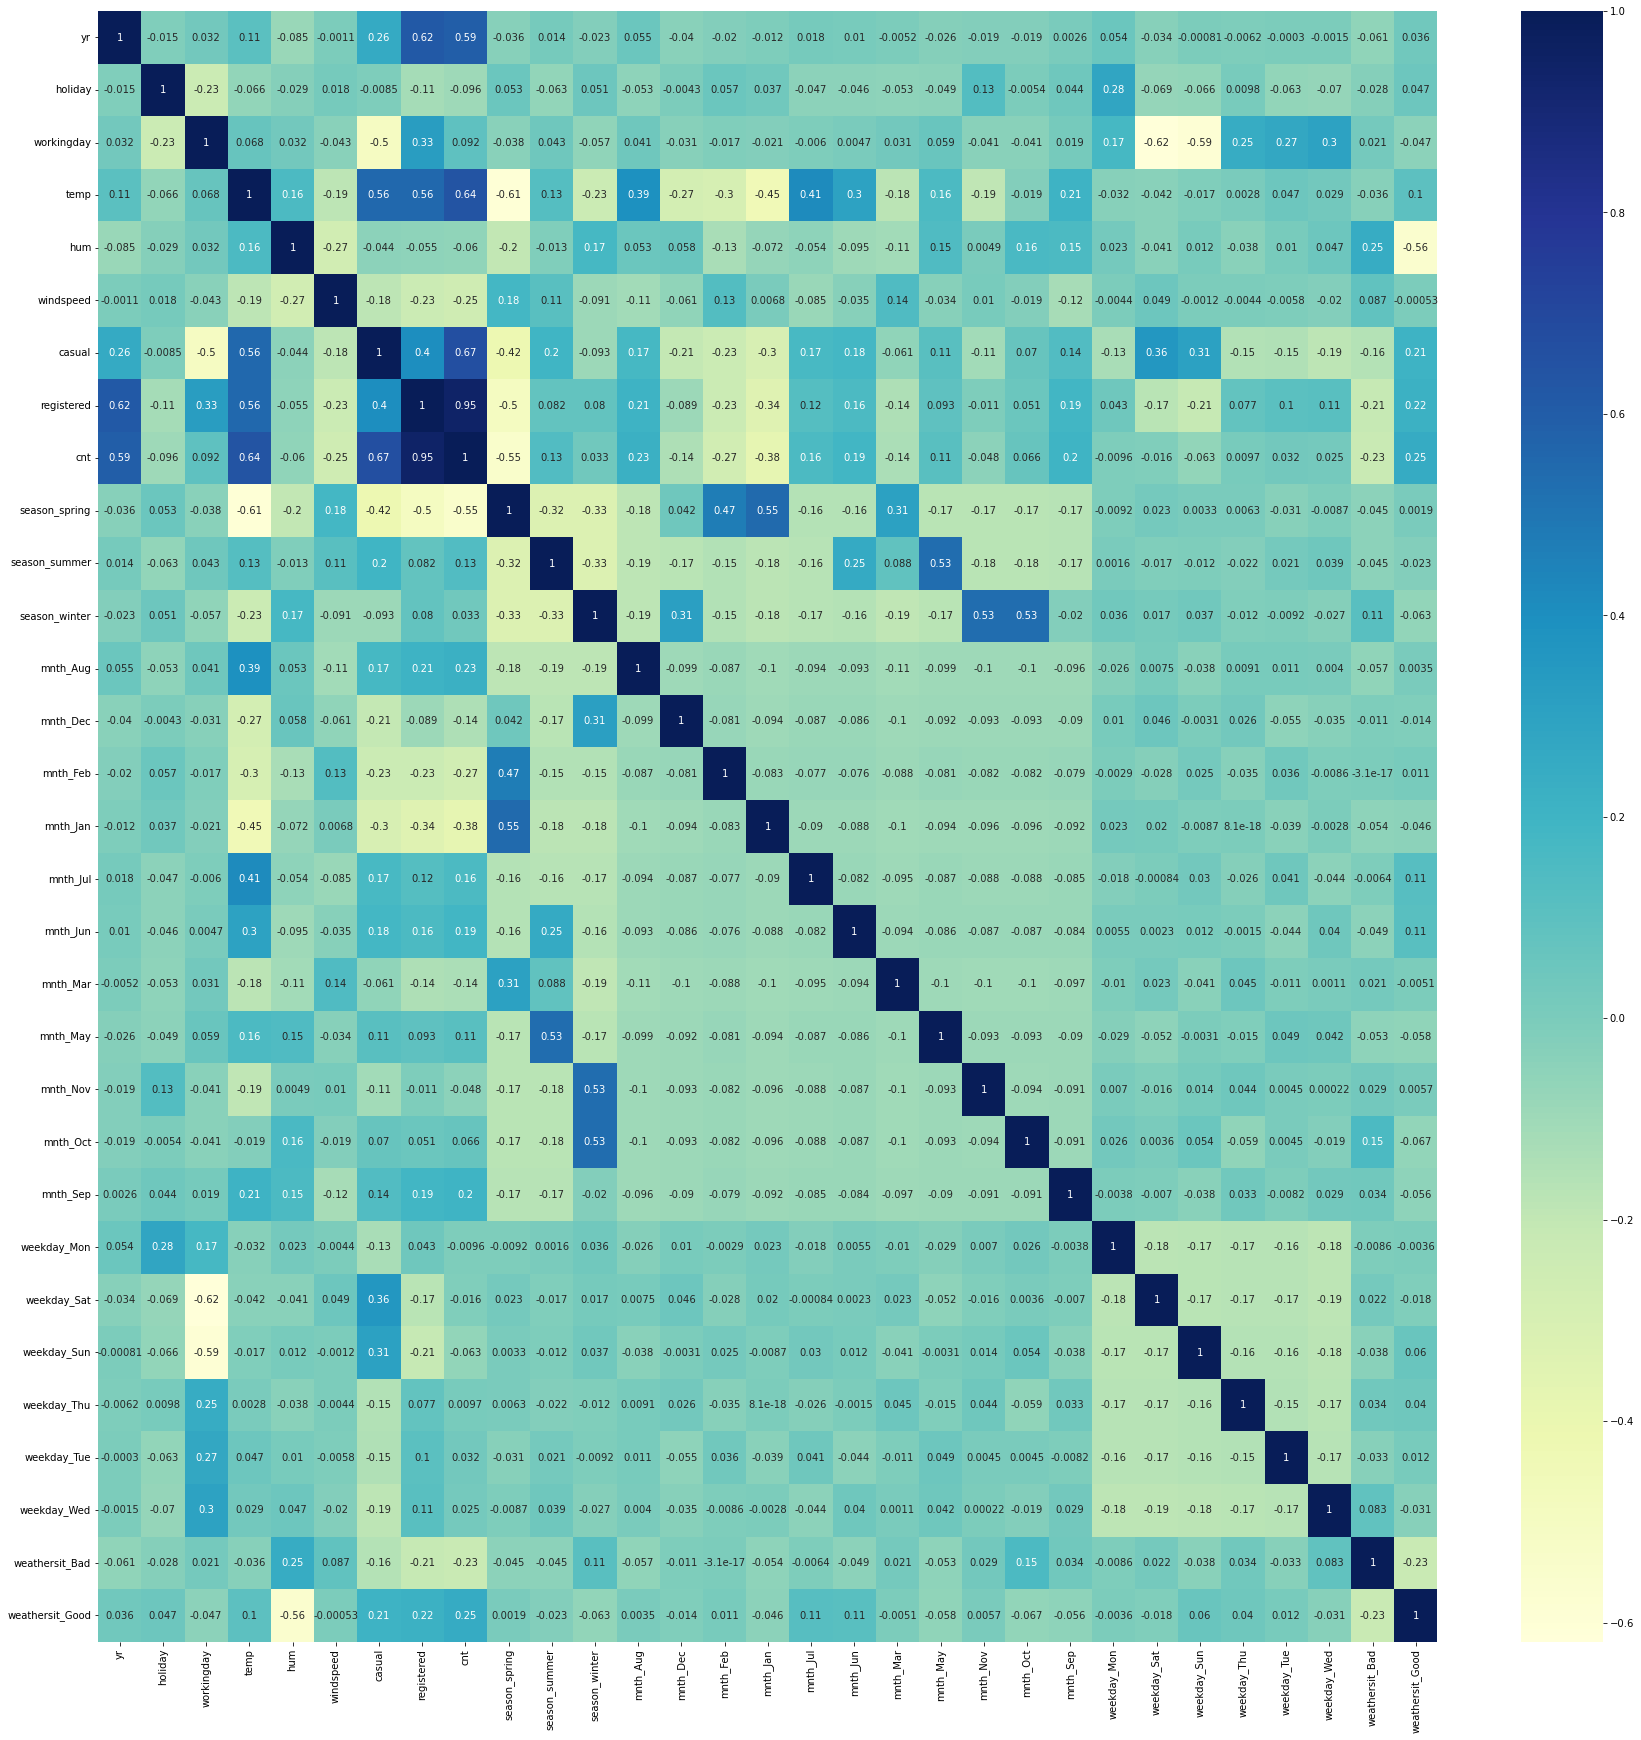

In [473]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (30, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### temp seems to the correlated to cnt the most, after 'casual' and 'registered'. Let's see a pairplot for temp vs cnt.

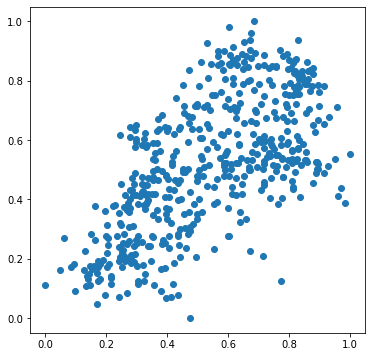

In [474]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

### Dividing into X and Y sets for the model building

In [475]:
# Dropping 'casual' and 'registered' as together they add up to cnt
y_train = df_train.pop('cnt')
X_train = df_train.drop(["casual","registered"],axis=1) 

In [476]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Bad,weathersit_Good
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,...,1,0,0,0,0,0,1,0,0,1
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [477]:
# This is done to convert all the features into array before fitting the model and avoid any error popping up
np.asarray(df_train)

array([[1., 0., 1., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [478]:
X_train.shape

(510, 28)

### Building the first model with all the features
Let's now build our first model with all the features.

In [479]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [480]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 2.32206374e-01 -4.99535426e+11 -4.99535426e+11  4.50958252e-01
 -1.51763916e-01 -1.86904669e-01 -4.75463867e-02  3.83758545e-02
  1.05926514e-01  1.40075684e-02 -4.60662842e-02 -3.30810547e-02
 -6.38999939e-02 -4.06036377e-02 -2.83813477e-03  9.70840454e-04
  2.37808228e-02 -4.24270630e-02  7.08770752e-03  8.03308487e-02
 -2.07824707e-02 -4.99535426e+11 -4.99535426e+11 -9.22012329e-03
 -1.90091133e-02 -5.45692444e-03 -1.96777344e-01  6.07604980e-02]
499535426338.4023


In [481]:
# getting the model summary
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Sun, 07 Aug 2022   Prob (F-statistic):          8.74e-182
Time:                        18:48:53   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1962      0.037      5.257      0.000       0.123       0.270
yr                  0.2321      0.008     28.820      0.000       0.216       0.248
holiday            -0.0023      0.024     -0.093      0.926      -0.050       0.045
workingday          0.0847      0.012      6.774      0.000       0.060       0.109
temp                0.4506      0.046      9.734      0.000       0.360       0.542
hum                -0.1513      0.038     -3.933      0.000      -0.227      -0.076
windspeed          -0.1865      0.026     -7.257      0.000      -0.237      -0.136
season_spring      -0.0482      0.030     -1.607      0.109      -0.107       0.011
season_summer       0.0387      0.026      1.478      0.140      -0.013       0.090
season_winter       0.1058      0.028      3.794      0.000       0.051       0.161
mnth_Aug            0.0144      0.034      0.428      0.669      -0.052       0.081
mnth_Dec           -0.0456      0.034     -1.358      0.175      -0.112       0.020
mnth_Feb           -0.0323      0.033     -0.982      0.327      -0.097       0.032
mnth_Jan           -0.0628      0.034     -1.873      0.062      -0.129       0.003
mnth_Jul           -0.0404      0.035     -1.151      0.250      -0.109       0.029
mnth_Jun           -0.0030      0.025     -0.119      0.906      -0.052       0.046
mnth_Mar            0.0010      0.025      0.043      0.966      -0.047       0.049
mnth_May            0.0239      0.021      1.140      0.255      -0.017       0.065
mnth_Nov           -0.0419      0.036     -1.152      0.250      -0.113       0.030
mnth_Oct            0.0075      0.036      0.211      0.833      -0.063       0.078
mnth_Sep            0.0811      0.032      2.533      0.012       0.018       0.144
weekday_Mon        -0.0209      0.015     -1.366      0.173      -0.051       0.009
weekday_Sat         0.0842      0.014      5.999      0.000       0.057       0.112
weekday_Sun         0.0296      0.014      2.058      0.040       0.001       0.058
weekday_Thu        -0.0092      0.016     -0.595      0.552      -0.040       0.021
weekday_Tue        -0.0189      0.015     -1.219      0.223      -0.049       0.012
weekday_Wed        -0.0054      0.015     -0.362      0.718      -0.035       0.024
weathersit_Bad     -0.1964      0.025     -7.869      0.000      -0.245      -0.147
weathersit_Good     0.0611      0.010      5.854      0.000       0.041       0.082
==============================================================================
Omnibus:                       84.475   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.382
Skew:                          -0.804   Prob(JB):                     7.72e-52
Kurtosis:                       5.914   Cond. No.                     1.56e+15


#### This model has an Adjusted R-squared value of 84.5% which seems pretty good. But let's see if we can reduce the number of features and exclude those which are not much relevant in explaining the target variable

### Model Building Using RFE
Now, you have close to 28 features. It is obviously not recommended to manually eliminate these features. So let's now build a model using recursive feature elimination to select features. We'll first start off with an arbitrary number of features (15 seems to be a good number to begin with)

In [484]:
# RFE with 15 features
lm = LinearRegression()
rfe1 = RFE(lm, n_features_to_select =15)

# Fit with 15 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_)  

[ True  True  True  True  True  True  True  True  True False False False
 False  True False False False False False  True False  True  True False
 False False  True  True]
[ 1  1  1  1  1  1  1  1  1  7  4  5  2  1 13 14  6  3 10  1  8  1  1 11
  9 12  1  1]


### Model Building and Evaluation
Let's now check the summary of this model using statsmodels

In [485]:
# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 15 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Jul,mnth_Sep,weekday_Sat,weekday_Sun,weathersit_Bad,weathersit_Good
653,1.0,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,1
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,0,1
426,1.0,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,1,0,0,0
728,1.0,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,1,0,1
482,1.0,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,1,0,0,0


In [486]:
# Fitting the model with 15 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Sun, 07 Aug 2022   Prob (F-statistic):          1.13e-191
Time:                        18:50:23   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1526      0.031     

#### The new model built on the selected features doesn't show much dip in the accuracy in comparison to the model which was built on all the features. It has gone from 84.5% to 84.3%. 
This is indeed a good indication to proceed with these selected features.


But let's check for the multicollinearity among these variables.

In [487]:
a=X_train_rfe1.drop('const',axis=1)

In [488]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,61.52
11,weekday_Sat,14.63
12,weekday_Sun,14.25
6,season_spring,5.02
3,temp,3.62
8,season_winter,3.49
1,holiday,3.36
7,season_summer,2.61
4,hum,1.91
14,weathersit_Good,1.63


In [489]:
# RFE with 7 features
lm = LinearRegression()
rfe2 = RFE(lm, n_features_to_select = 7)

# Fit with 7 features
rfe2.fit(X_train, y_train)

# Print the boolean results
print(rfe2.support_)           
print(rfe2.ranking_)  

[ True  True  True  True False False False False False False False False
 False False False False False False False False False  True  True False
 False False  True False]
[ 1  1  1  1  3  2  4  9  8 15 12 13 10  5 21 22 14 11 18  7 16  1  1 19
 17 20  1  6]


In [490]:
# Subset the features selected by rfe1
col1 = X_train.columns[rfe2.support_]

# Subsetting training data for 7 selected columns
X_train_rfe2 = X_train[col1]

# Add a constant to the model
X_train_rfe2 = sm.add_constant(X_train_rfe2)
X_train_rfe2.head()

,const,yr,holiday,workingday,temp,weekday_Sat,weekday_Sun,weathersit_Bad
653,1.0,1,0,1,0.509887,0,0,0
576,1.0,1,0,1,0.815169,0,0,0
426,1.0,1,0,0,0.442393,1,0,0
728,1.0,1,0,0,0.245101,0,1,0
482,1.0,1,0,0,0.395666,1,0,0


In [491]:
# Fitting the model with 7 variables
lm2 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     224.0
Date:                Sun, 07 Aug 2022   Prob (F-statistic):          1.41e-138
Time:                        18:55:06   Log-Likelihood:                 370.22
No. Observations:                 510   AIC:                            -726.4
Df Residuals:                     503   BIC:                            -696.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0578      0.013      4.

In [492]:
# Dropping holiday and weekday_sun as their p values are very high
X_train_rfe2 = X_train_rfe2.drop(['holiday','weekday_Sun'], axis=1)

# Add a constant to the model
X_train_rfe2 = sm.add_constant(X_train_rfe2)
X_train_rfe2.head()

,const,yr,workingday,temp,weekday_Sat,weathersit_Bad
653,1.0,1,1,0.509887,0,0
576,1.0,1,1,0.815169,0,0
426,1.0,1,0,0.442393,1,0
728,1.0,1,0,0.245101,0,0
482,1.0,1,0,0.395666,1,0


In [493]:
lm2 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     268.3
Date:                Sun, 07 Aug 2022   Prob (F-statistic):          1.72e-139
Time:                        19:10:13   Log-Likelihood:                 369.46
No. Observations:                 510   AIC:                            -726.9
Df Residuals:                     504   BIC:                            -701.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0538      0.018      2.

In [494]:
b=X_train_rfe2.drop('const',axis=1)

In [495]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = b.columns
vif['VIF'] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.00
1,workingday,3.27
0,yr,1.96
3,weekday_Sat,1.46
4,weathersit_Bad,1.03


In [496]:
X_train_rfe2

,const,yr,workingday,temp,weekday_Sat,weathersit_Bad
653,1.0,1,1,0.509887,0,0
576,1.0,1,1,0.815169,0,0
426,1.0,1,0,0.442393,1,0
728,1.0,1,0,0.245101,0,0
482,1.0,1,0,0.395666,1,0
...,...,...,...,...,...,...
526,1.0,1,1,0.824514,0,0
578,1.0,1,1,0.863973,0,0
53,1.0,0,1,0.202618,0,0
350,1.0,0,0,0.248216,1,0


#### All the VIF values and p-values seem to be in the permissible range now. Also the `Adjusted R-squared` value has dropped from `84.5%` with **28 variables** to just `72.4%` using **5 variables**. This model is explaining most of the variance without being too complex. So let's proceed with this model.

### Residual Analysis
Before we make predictions on the test set, let's first analyse the residuals.

In [499]:
y_train_cnt = lm2.predict(X_train_rfe2)

Text(0.5, 0, 'Errors')

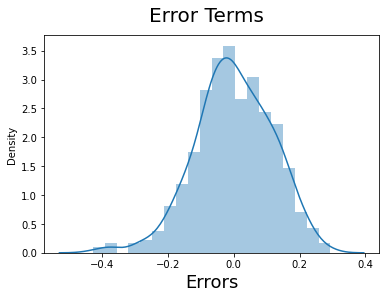

In [500]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
# Plot heading
fig.suptitle('Error Terms', fontsize = 20)    
# Give the X-label
plt.xlabel('Errors', fontsize = 18)  

#### The error terms are fairly normally distributed and we can surely live with this. Let's now make predictions on the test-set.

### Making Predictions
We would first need to scale the test set as well. So let's start with that.

In [501]:
X_train_rfe2

,const,yr,workingday,temp,weekday_Sat,weathersit_Bad
653,1.0,1,1,0.509887,0,0
576,1.0,1,1,0.815169,0,0
426,1.0,1,0,0.442393,1,0
728,1.0,1,0,0.245101,0,0
482,1.0,1,0,0.395666,1,0
...,...,...,...,...,...,...
526,1.0,1,1,0.824514,0,0
578,1.0,1,1,0.863973,0,0
53,1.0,0,1,0.202618,0,0
350,1.0,0,0,0.248216,1,0


In [502]:
# let's recall the set of variables which are to be scaled
var

['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [503]:
df_test[var] = scaler.transform(df_test[var])

In [504]:
# Split the 'df_test' set into X and y after scaling
y_test = df_test.pop('cnt')
X_test = df_test.drop(["casual","registered"],axis=1)

In [505]:
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Bad,weathersit_Good
184,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
535,1,0,1,0.901354,0.610133,0.153728,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
299,0,0,1,0.511964,0.837699,0.334206,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
221,0,0,1,0.881625,0.437098,0.339570,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
152,0,0,1,0.817246,0.314298,0.537414,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1


In [507]:
# Let's check the list 'col2' which had the 5 variables RFE had selected
col2=b.columns
col2

Index(['yr', 'workingday', 'temp', 'weekday_Sat', 'weathersit_Bad'], dtype='object')

In [508]:
# Let's subset these columns and create a new dataframe 'X_test_rfe1'
X_test_rfe2 = X_test[col2]

In [509]:
# Add a constant to the test set created
X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   const           219 non-null    float64
 1   yr              219 non-null    int64  
 2   workingday      219 non-null    int64  
 3   temp            219 non-null    float64
 4   weekday_Sat     219 non-null    uint8  
 5   weathersit_Bad  219 non-null    uint8  
dtypes: float64(2), int64(2), uint8(2)
memory usage: 9.0 KB


In [512]:
# Making predictions
y_pred = lm2.predict(X_test_rfe2)

Text(0, 0.5, 'y_pred')

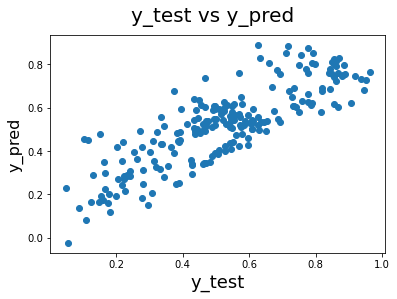

In [513]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

#### From the above plot, it's evident that the model is doing well on the test set as well. Let's also check the R-squared and more importantly, the adjusted R-squared value for the test set.

In [515]:
# r2_score for 5 variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6962941478653449

#### Thus, for the model with 5 variables, the r-squared on training and test data is about 72.4% and 69.6% respectively. The adjusted r-squared on the train set is about is about 72.4%.

#### Checking the correlations between the final predictor variables

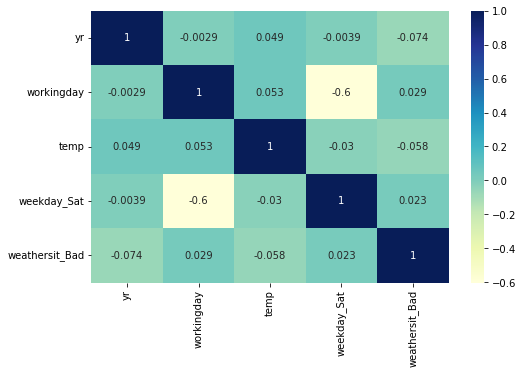

In [516]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(df[col2].corr(), cmap="YlGnBu", annot=True)
plt.show()

#### This is the simplest model that we could build. The final predictors seem to have fairly low correlations.